In [1]:
#my favorite and sure starting point because there's rarely ever an error
#importing packages and the transaction file with data

import pandas as pd
import matplotlib.pyplot as plt
import json
import calendar

file = '/Users/jessie/transaction-data-adhoc-analysis.json'
lt = pd.read_json(file)

In [2]:
# to complete the necessary data, a transaction month column is added because lola tamis requests breakdowns per month

def date(x):
    month = int(x[6:len(x)-3])
    m = calendar.month_name[month]
    return m

lt['transaction_month'] = lt['transaction_date'].apply(date).astype(pd.api.types.CategoricalDtype(categories=['January','February','March','April','May','June']))

In [3]:
# lola tamis said she prefers if the data had one “line item” per row, so to accomplish this, at this point we are splitting up the transaction items
# using explode to transfer each item into its own row

lt['transaction_items'] = lt['transaction_items'].str.split(";")
lt_final = lt.explode('transaction_items',False)

In [4]:
lt
# just for viewing in comparison to original file with 9 columns
# at this point we can see that there are now 10 columns after adding transaction month column
# the transaction items are also now split up 

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"[Exotic Extras,Beef Chicharon,(x4)]",5196,2022/01/12,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",12056,2022/01/12,January
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...",5500,2022/01/08,January
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"[HealthyKid 3+,Yummy Vegetables,(x1)]",500,2022/01/10,January
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"[Candy City,Orange Beans,(x3), Candy City,Gumm...",2697,2022/01/24,January
...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"[Exotic Extras,Kimchi and Seaweed,(x2), Health...",3588,2022/06/05,June
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[HealthyKid 3+,Yummy Vegetables,(x1), Exotic E...",2095,2022/06/12,June
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[Candy City,Orange Beans,(x4), Candy City,Gumm...",3396,2022/06/15,June
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"[HealthyKid 3+,Nutrional Milk,(x2), Candy City...",4280,2022/06/09,June


In [5]:
lt_final
# just for viewing
# at this point we can see that the line items are now in different rows as per lola tamis' request because of the explode function
# this data frame is now what we will be using moving forward

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_month
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3)",12056,2022/01/12,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk,(x4)",12056,2022/01/12,January
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans,(x1)",12056,2022/01/12,January
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3)",5500,2022/01/08,January
...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2)",4280,2022/06/09,June
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms,(x2)",4280,2022/06/09,June
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk,(x1)",2639,2022/06/03,June
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms,(x3)",2639,2022/06/03,June


In [6]:
# adding quantity column which will help in computing total prices
def quant_items(x):
    charset = [
        *[str(i) for i in range(10)]
    ]
    x = ''.join([i for i in x if i in charset])
    return int(x[-1])

lt_final['quantity_per_item'] = lt_final['transaction_items'].apply(quant_items)

In [7]:
# cleaning up the item name 
def item(x):
    item_edited = x.split(",")[1]
    return (item_edited)

lt_final['transaction_items'] = lt_final['transaction_items'].apply(item)

In [8]:
# computing for the price per item
price_list = {'Beef Chicharon': list(lt_final.loc[(lt_final.transaction_items == 'Beef Chicharon')].min(numeric_only=True))[0], 
              'Nutrional Milk':list(lt_final.loc[(lt_final.transaction_items == 'Nutrional Milk')].min(numeric_only=True))[0],
              'Gummy Vitamins': list(lt_final.loc[(lt_final.transaction_items == 'Gummy Vitamins')].min(numeric_only=True))[0],
              'Gummy Worms':list(lt_final.loc[(lt_final.transaction_items == 'Gummy Worms')].min(numeric_only=True))[0],
              'Kimchi and Seaweed':list(lt_final.loc[(lt_final.transaction_items == 'Kimchi and Seaweed')].min(numeric_only=True))[0],
              'Yummy Vegetables':list(lt_final.loc[(lt_final.transaction_items == 'Yummy Vegetables')].min(numeric_only=True))[0],
              'Orange Beans':list(lt_final.loc[(lt_final.transaction_items == 'Orange Beans')].min(numeric_only=True))[0]}

In [9]:
# adding column of price per item 
def price_per_item(x):
    final_price_list = {'Beef Chicharon': 1299, 'Nutrional Milk': 1990, 'Gummy Vitamins': 1500, 'Gummy Worms': 150, 'Kimchi and Seaweed': 799, 'Yummy Vegetables': 500,'Orange Beans': 199}
    return final_price_list[x]
    
lt_final['price_per_item'] = lt_final['transaction_items'].apply(price_per_item)

In [10]:
# computing for total prices by multiplying quantity per item to price per item 
lt_final['total_price_per_item'] = lt_final['quantity_per_item'] * lt_final['price_per_item']

# ordering the columns properly
lt_final = lt_final[['name','transaction_items','price_per_item','quantity_per_item','total_price_per_item','transaction_value','transaction_month','transaction_date']]

In [11]:
lt_final
# this is the cleaned transaction data with all relevant information

,name,transaction_items,price_per_item,quantity_per_item,total_price_per_item,transaction_value,transaction_month,transaction_date
0,Jennifer Campbell,Beef Chicharon,1299,4,5196,5196,January,2022/01/12
1,Melissa Kim,Beef Chicharon,1299,3,3897,12056,January,2022/01/12
1,Melissa Kim,Nutrional Milk,1990,4,7960,12056,January,2022/01/12
1,Melissa Kim,Orange Beans,199,1,199,12056,January,2022/01/12
2,Melissa Kim,Gummy Vitamins,1500,3,4500,5500,January,2022/01/08
...,...,...,...,...,...,...,...,...
83034,Donald Andersen,Nutrional Milk,1990,2,3980,4280,June,2022/06/09
83034,Donald Andersen,Gummy Worms,150,2,300,4280,June,2022/06/09
83035,Stephanie Russell,Nutrional Milk,1990,1,1990,2639,June,2022/06/03
83035,Stephanie Russell,Gummy Worms,150,3,450,2639,June,2022/06/03


In [12]:
# creating the breakdown of the count of each item sold per month in a pivot table
count_of_items_sold_per_month = pd.pivot_table(lt_final, index='transaction_month', columns='transaction_items',values='quantity_per_item',aggfunc=sum)

Text(0.5, 1.0, 'counts of items purchased per month')

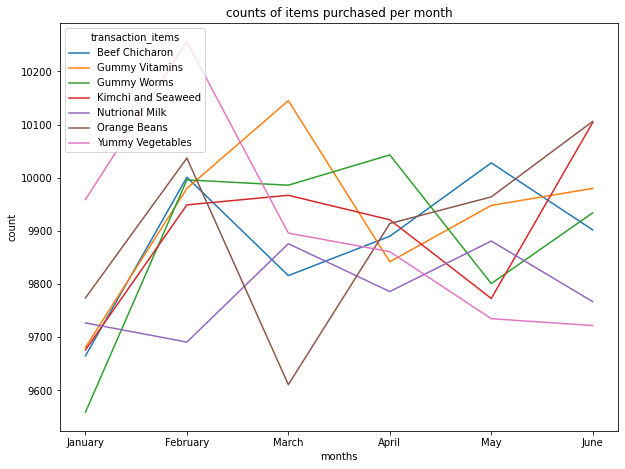

In [13]:
#graphing the pivot table of the count of each item sold per month to help analysis
a=count_of_items_sold_per_month.plot.line(figsize=(10,7.5))
a.set_xlabel('months')
a.set_ylabel('count')
a.set_title('counts of items purchased per month')

In [14]:
count_of_items_sold_per_month=count_of_items_sold_per_month.transpose()

count_of_items_sold_per_month
#second of two pivot tables

transaction_month,January,February,March,April,May,June
transaction_items,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


In [15]:
# creating the breakdown of the total sale value per item per month in a pivot table
sale_value_per_item_per_month = pd.pivot_table(lt_final, index='transaction_month', columns='transaction_items',values='total_price_per_item',aggfunc='sum')

Text(0.5, 1.0, 'sale value of items per month')

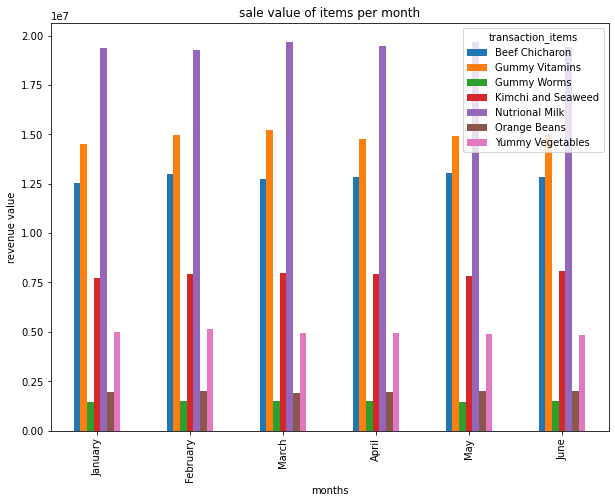

In [16]:
#graphing the pivot table of the total sale value per item per month to help analysis
a=sale_value_per_item_per_month.plot.bar(figsize=(10,7.5))
a.set_xlabel('months')
a.set_ylabel('revenue value')
a.set_title('sale value of items per month')

In [17]:
sale_value_per_item_per_month=sale_value_per_item_per_month.transpose()

sale_value_per_item_per_month
#second of two pivot tables

transaction_month,January,February,March,April,May,June
transaction_items,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


In [18]:
lt['bin']=1
# this is the bin column from the very first file 

In [19]:
bin_value = pd.pivot_table(lt,index='name',columns='transaction_month',values='bin',aggfunc='count',margins=True)

In [20]:
# repeater table containing months and the number of customers from the current month who also purchased in the previous month

repeater = {'January':0, 
            'February':len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1)])-1,
            'March':len(bin_value[(bin_value.February >= 1) & (bin_value.March >= 1)])-1,
            'April':len(bin_value[(bin_value.March >= 1) & (bin_value.April >= 1)])-1,
            'May': len(bin_value[(bin_value.April >= 1) & (bin_value.May >= 1)])-1,
            'June': len(bin_value[(bin_value.May >= 1) & (bin_value.June >= 1)])-1}

In [21]:
repeater
# just for viewing

{'January': 0,
 'February': 5172,
 'March': 5216,
 'April': 5154,
 'May': 5110,
 'June': 5193}

In [22]:
# inactive table containing months and the number of customers in the total set of transactions up to and including the current month who have purchase history but do not have a purchase for the current month
inactive = {'January':0, 
            'February':len(bin_value[(bin_value.January >= 0) & (bin_value.February == 0)])-len(bin_value[(bin_value.January == 0) & (bin_value.February == 0)]),
            'March':len(bin_value[(bin_value.January >= 0) & (bin_value.February >= 0) & (bin_value.March == 0)])-len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0)]),
            'April':len(bin_value[(bin_value.January >= 0) & (bin_value.February >= 0) & (bin_value.March >= 0) & (bin_value.April == 0)]) - len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April == 0)]),
            'May': len(bin_value[(bin_value.January >= 0) & (bin_value.February >= 0) & (bin_value.March >= 0) & (bin_value.April >= 0) & (bin_value.May == 0)]) - len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April == 0) & (bin_value.May == 0)]),
            'June': len(bin_value[(bin_value.January >= 0) & (bin_value.February >= 0) & (bin_value.March >= 0) & (bin_value.April >= 0) & (bin_value.May >= 0) & (bin_value.June == 0)])-- len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April == 0) & (bin_value.May == 0) & (bin_value.June == 0)])}

In [23]:
inactive
# just for viewing

{'January': 0,
 'February': 1416,
 'March': 1747,
 'April': 1909,
 'May': 1917,
 'June': 1835}

In [24]:
# engaged table containing months and he number of customers in the total set of transactions up to and including the current month who have consistently purchased every single month
engaged = {'January':len(bin_value[bin_value.January >= 1])-1, 
            'February':len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1)])-1,
            'March':len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1) & (bin_value.March >= 1)])-1,
            'April':len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1) & (bin_value.March >= 1) & (bin_value.April >= 1)])-1,
            'May': len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1) & (bin_value.March >= 1) & (bin_value.April >= 1) & (bin_value.May >= 1)])-1,
            'June': len(bin_value[(bin_value.January >= 1) & (bin_value.February >= 1) & (bin_value.March >= 1) & (bin_value.April >= 1) & (bin_value.May >= 1) & (bin_value.June >= 1)])-1}

In [25]:
engaged
# just for viewing

{'January': 6588,
 'February': 5172,
 'March': 4126,
 'April': 3289,
 'May': 2667,
 'June': 2190}

In [26]:
# additional first table given other useful activity metrics as requested by lola tamis
# first table containing months and the number of customers that purchased for the first time in 2022

first = {'January':len(bin_value[bin_value.January >= 1]),
        'February':len(bin_value[(bin_value.January == 0) & (bin_value.February >= 1)]),
        'March':len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March >= 1)]),
        'April':len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April >= 1)]),
        'May': len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April == 0) & (bin_value.May >= 1)]),
        'June': len(bin_value[(bin_value.January == 0) & (bin_value.February == 0) & (bin_value.March == 0) & (bin_value.April == 0) &(bin_value.May == 0) & (bin_value.June >= 1)])}

In [27]:
first
#just for viewing

{'January': 6589,
 'February': 1459,
 'March': 322,
 'April': 96,
 'May': 20,
 'June': 2}

In [28]:
# putting the data collected for repeater, inactive and engaged in one table or data frame together, along with the additional data for first timers

table_data ={'repeater':repeater,
        'inactive':inactive,
        'engaged':engaged,
        'first timers':first}

final_table = pd.DataFrame.from_dict(table_data, orient ='index') 

In [29]:
final_table
# this is the final table containing customer activity data

,January,February,March,April,May,June
repeater,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190
first timers,6589,1459,322,96,20,2
